<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера v2</b></font>
    <br /> 
    <font size="3", color = "black">
        <b></b>

Приветствую ещё раз!

Основные моменты исправлены, и далеко не только лишь они, так что причин ещё раз отправить на доработку у меня нет. Принимаю твой проект.

Успехов с последующими заданиями курса!

<div class="alert alert-info">
<font size="4"><b>Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
    Привет, Мария! Спасибо, что прислала задание :) <br>Меня зовут Никита Сон и я буду проверять твой проект. Предлагаю обращаться друг к другу на ты, как это принято в Практикуме, если ты не против. Но если хочешь на Вы - не буду возражать 🙂
        
Поехали 🚀
    <br />

Мои комментарии обозначены пометкой <b>Комментарий ревьюера</b>. При внесении правок в проект, пожалуйста, не меняй и не удаляй их т.к. дальнейшая проверка будет происходить в том числе на основе того, исправлены замечания в комментариях или нет. Зато ты всегда можешь оставить свои комментарии для меня :)
    </font>
</div>

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
В зелёных блоках будут позитивные комментарии
<br />
    </font>
</div>

<div class="alert alert-warning">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
В жёлтых - некритичные замечания
    </font>
</div>

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
В красных - важные замечания, которые надо обязательно устранить
    </font>
</div>

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
В синих с пиццей - различные нейтральные сообщения, советы на будущее и прочее.
    </font>
</div>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 100 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Ход исследования:**

- Загрузка и подготовка данных
- Обучение и проверка модели, которая предсказывает объем сырья
- Подготовка и расчет прибыли по выбранным скважинам и предсказаниям модели
- Расчет рисков и прибыли для каждого региона

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Загрузка и подготовка данных

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
display(geo_data_0)
display(geo_data_1)
display(geo_data_2)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


**Изучим данные датасета geo_data_0**

In [3]:
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Видим, что у всех колонок корректный вид, переименовывать не нужно

In [4]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


У всех колонок корректный тип данных, пропусков не наблюдается

In [5]:
print(geo_data_0.duplicated().sum())
geo_data_0[geo_data_0.duplicated()]

0


,id,f0,f1,f2,product


In [6]:
geo_data_0.duplicated(subset=['f0', 'f1', 'f2', 'product']).sum()

0

Видим, что дубликатов нет

In [7]:
geo_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


По данной таблице можно сделать следующий вывод:

- Объем запасов (product): Средний объем запасов составляет 92.5 тыс. баррелей, с максимальным значением 185.36 тыс. баррелей и минимальным значением 0. Это указывает на наличие как скважин с значительными запасами, так и скважин с отсутствием запасов.
- f0:
Среднее значение: 0.5004, что близко к нулю, указывает на сбалансированное распределение значений.
Разброс: Стандартное отклонение 0.8718 говорит о том, что значения f0 варьируются достаточно широко.
Квартильные значения: Медиана (0.5024) и 75-й процентиль (1.0736) показывают, что большая часть значений сосредоточена в положительной области.
- f1: 
Среднее значение: 0.2501, что также близко к нулю, но ниже, чем у f0.
Разброс: Стандартное отклонение 0.5044 указывает на меньший разброс по сравнению с f0.
Квартильные значения: Медиана (0.2503) и 75-й процентиль (0.7006) показывают, что большинство значений находятся в пределах от -0.2009 до 0.7006.
- f2:
Среднее значение: 2.5026, что значительно выше, чем у f0 и f1.
Разброс: Стандартное отклонение 3.2482 указывает на высокий уровень вариативности, что может быть связано с наличием выбросов (например, минимальное значение -12.0883).
Квартильные значения: Медиана (2.5160) и 75-й процентиль (4.7151) показывают, что значения f2 в основном положительные, но с возможными значительными отклонениями.

Таким образом, признаки f0 и f1 имеют сбалансированное распределение, в то время как f2 демонстрирует значительную вариативность.
Объем запасов в скважинах варьируется от 0 до 185.36 тыс. баррелей, что указывает на наличие как богатых, так и бедных скважин.


**Изучим данные датасета geo_data_1**

In [8]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


Видим, что у всех колонок корректный вид, переименовывать не нужно

In [9]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


У всех колонок корректный тип данных, пропусков не наблюдается

In [10]:
print(geo_data_1.duplicated().sum())
geo_data_1[geo_data_1.duplicated()]

0


,id,f0,f1,f2,product


In [11]:
geo_data_1.duplicated(subset=['f0', 'f1', 'f2', 'product']).sum()

0

Дубликатов не наблюдается

In [12]:
geo_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


По данной таблице, наблюдаем:

- Объем запасов (product): Средний объем запасов составляет 68.83 тыс. баррелей, с максимальным значением 137.95 тыс. баррелей и минимальным значением 0. Это указывает на наличие как скважин с значительными запасами, так и скважин с отсутствием запасов.

- f0:
Среднее значение: 1.1413, что указывает на положительное смещение значений.
Разброс: Стандартное отклонение 8.9659 говорит о большом разбросе значений, что может указывать на наличие выбросов.
Квартильные значения:
25%: -6.2986
50% (медиана): 1.1531
75%: 8.6210 Это говорит о том, что значения f0 варьируются от сильно отрицательных до положительных, с преобладанием положительных значений в верхней части распределения.
- f1:
Среднее значение: -4.7966, что указывает на преобладание отрицательных значений.
Разброс: Стандартное отклонение 5.1199 также указывает на значительный разброс.
Квартильные значения:
25%: -8.2680
50% (медиана): -4.8132
75%: -1.3328 Это говорит о том, что большинство значений f1 находятся в отрицательной области, с небольшим количеством положительных значений.
- f2:
Среднее значение: 2.4945, что указывает на положительное смещение значений.
Разброс: Стандартное отклонение 1.7036 говорит о меньшем разбросе по сравнению с f0.
Квартильные значения:
25%: 1.0000
50% (медиана): 2.0115
75%: 4.0000 Это говорит о том, что значения f2 в основном положительные и сосредоточены в диапазоне от 1 до 4.


Так, f0 имеет положительное среднее значение, но также значительный разброс, что может указывать на наличие выбросов.
Признак f1 имеет отрицательное среднее значение и сосредоточен в отрицательной области, что может указывать на его ограниченное влияние на объем запасов.
Признак f2 имеет положительное среднее значение и меньший разброс, что может указывать на его более стабильное влияние на объем запасов.
Объем запасов в скважинах варьируется от 0 до 137.95 тыс. баррелей, что указывает на наличие как богатых, так и бедных скважин.

**Изучим данные датасета geo_data_2**

In [13]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Названия колонок корректные, переименовывать не нужно

In [14]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


У всех признаков корректный тип данных, пропусков нет

In [15]:
print(geo_data_2.duplicated().sum())
geo_data_2[geo_data_2.duplicated()]

0


,id,f0,f1,f2,product


In [16]:
geo_data_2.duplicated(subset=['f0', 'f1', 'f2', 'product']).sum()

0

Дубликатов не наблюдается

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Несмотря на то, что нет явных дубликатов, в данных текущего проекта есть неявные - скважины с одинаковым id. Такое тоже желательно обнаруживать.

In [17]:
geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


По данному графику можно сделать вывод:

- Объем запасов (product): Средний объем запасов составляет 95.0 тыс. баррелей, с максимальным значением 190.03 тыс. баррелей и минимальным значением 0. Это указывает на наличие как скважин с значительными запасами, так и скважин с отсутствием запасов.

- f0:
Среднее значение: 0.0020, что близко к нулю, указывая на сбалансированное распределение значений вокруг нуля.
Разброс: Стандартное отклонение 1.7320 говорит о значительном разбросе значений, что может указывать на наличие выбросов.
Квартильные значения:
25%: -1.1623
50% (медиана): 0.0094
75%: 1.1585 Это говорит о том, что значения f0 варьируются от отрицательных до положительных, с преобладанием значений, близких к нулю.

- f1:
Среднее значение: -0.0021, что также близко к нулю, но с преобладанием отрицательных значений.
Разброс: Стандартное отклонение 1.7304 указывает на значительный разброс.
Квартильные значения:
25%: -1.1748
50% (медиана): -0.0095
75%: 1.1637 Это говорит о том, что большинство значений f1 находятся в диапазоне от отрицательных до положительных, с некоторыми значениями, значительно превышающими ноль.
- f2:
Среднее значение: 2.4951, что указывает на положительное смещение значений.
Разброс: Стандартное отклонение 3.4734 говорит о высоком уровне вариативности, что может быть связано с наличием выбросов (например, минимальное значение -11.9703).
Квартильные значения:
25%: 0.1304
50% (медиана): 2.4842
75%: 4.8588 Это говорит о том, что значения f2 в основном положительные, но с возможными значительными отклонениями.


Признаки f0 и f1 имеют средние значения, близкие к нулю, что указывает на сбалансированное распределение, но с высоким уровнем разброса.
Признак f2 имеет положительное среднее значение и значительный разброс, что может указывать на его влияние на объем запасов.
Объем запасов в скважинах варьируется от 0 до 190.03 тыс. баррелей, что указывает на наличие как богатых, так и бедных скважин.

**Проведем анализ данных в датасете geo_data_0**

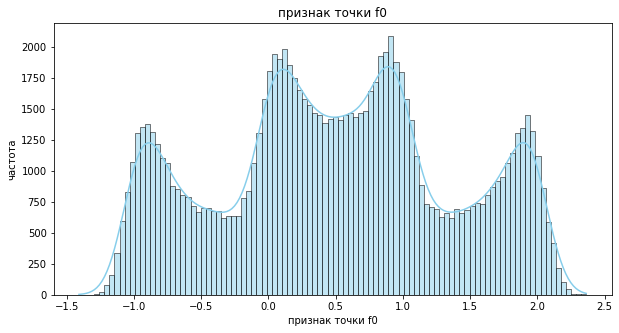

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(geo_data_0['f0'], bins=100, kde=True, color='skyblue')
plt.title(f'признак точки f0')
plt.xlabel('признак точки f0')
plt.ylabel('частота')
plt.show()

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Я ревьюер простой: вижу графики признаков - пишу зелёный комментарий

По данному графику можно сказать, что распределение модальное, есть несколько пиков.
Это указывает на наличие подгрупп в данных по признаку f0.
Распределение асимметрично, больше плотности сосредоточено в интервале от 0 до 1.2.

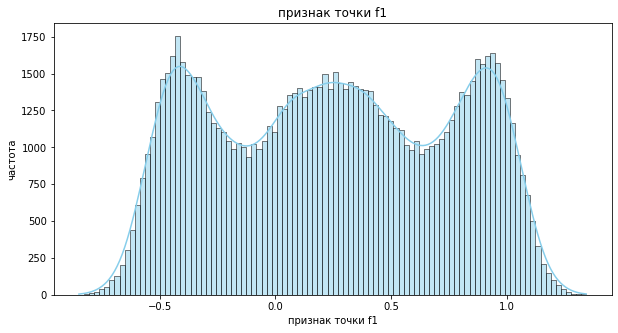

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(geo_data_0['f1'], bins=100, kde=True, color='skyblue')
plt.title(f'признак точки f1')
plt.xlabel('признак точки f1')
plt.ylabel('частота')
plt.show()

Видно, что распределение модальное (многогорбое) — есть несколько пиков, особенно вблизи -0.5, 0.0, и 0.8.
Это указывает на наличие кластеров или подгрупп в данных по признаку f1.
Распределение асимметрично, больше плотности сосредоточено в интервале от -0.8 до 1.2.

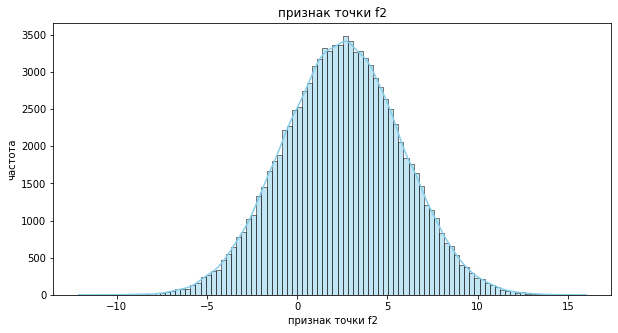

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(geo_data_0['f2'], bins=100, kde=True, color='skyblue')
plt.title(f'признак точки f2')
plt.xlabel('признак точки f2')
plt.ylabel('частота')
plt.show()

Распределение близко к нормальному, но с длинным "хвостом" вправо.
Есть лёгкая асимметрия: данные смещены в сторону положительных значений.
Признак варьируется от примерно -10 до 16.


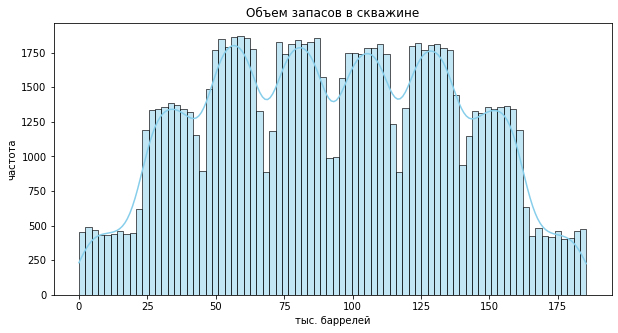

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(geo_data_0['product'], bins=80, kde=True, color='skyblue')
plt.title(f'Объем запасов в скважине')
plt.xlabel('тыс. баррелей')
plt.ylabel('частота')
plt.show()

Распределение с несколькими пиками, что может говорить о сегментированности скважин по объёму запасов.
Явно видны пики в районе 25, 50, 75, 100, 125 и 150 тыс. баррелей — возможно, эти значения связаны с ограничениями или округлениями при оценке.
Распределение не является нормальным и имеет ступенчатую структуру.


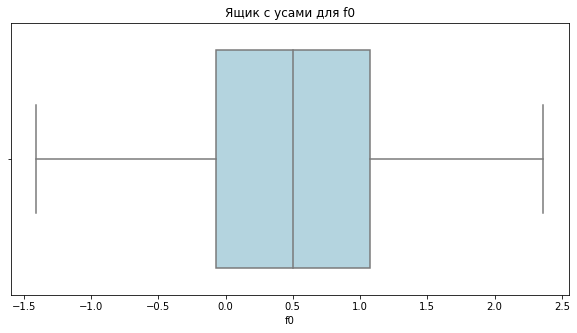

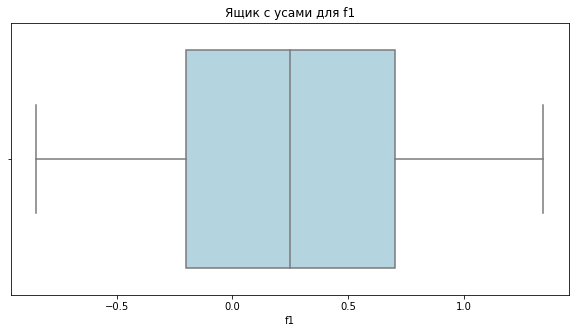

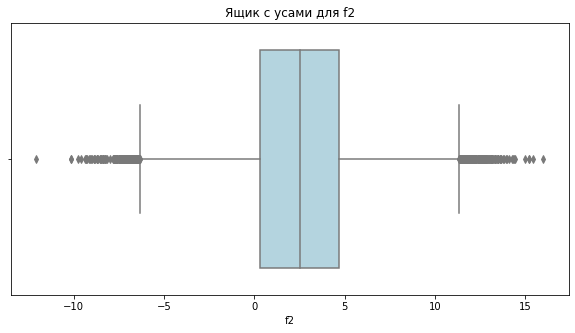

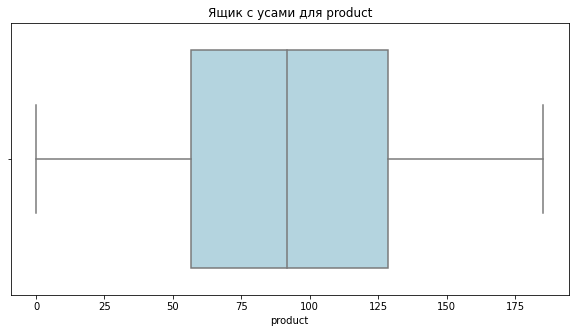

In [22]:
numerical_features = ['f0', 'f1',
                     'f2', 'product']
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=geo_data_0[feature], color='lightblue')
    plt.title(f'Ящик с усами для {feature}')
    plt.xlabel(feature)
    plt.show()

- В столбце f0 медиана - 0.5, среднее значение - 0.5. Усы имеют примерно одинаковую длину, достаточно длинные с обеих сторон, что указывает на вариативность данных. По данному графику можно сказать, что распределение нормальное
- В столбце f1 медиана - 0.25, среденее значение - 0.25. Усы имеют примерно одинаковую длину, они уже короче, чем у предыдущего признака. По графику видно, что данные размещены симметрично
- В столбце f2 медиана - 2.5, среденее значение - 2.5. Усы примерно одинаковой длины, намного короче, чем у предыдущих признаков. Наблюдаются выбросы за пределами первого и третьего квартиля
- В столбце product медиана - 91.8, среденее значение - 92.5. Левый ус длиннее, чем правый, что указывает на незначительную ассиметрию и высокую вариативность данных.

Изучим столбец с выбросами подробнее

In [23]:
# Вычисляем Q1 и Q3
Q1 = geo_data_0['f2'].quantile(0.25)
Q3 = geo_data_0['f2'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Идентификация выбросов
outliers = geo_data_0[(geo_data_0['f2'] < lower_bound) | (geo_data_0['f2'] > upper_bound)]

# Выводим выбросы
print(outliers.shape)

(506, 5)


Так как в столбце f2 достаточно много выбросов, удалять их не стоит, ведь они могут содержать важную информацию, поэтому оставим эти значения без изменений

Так в наших данных признаки числовые, а не смешанные лучше использовать матрицу корреляции Пирсона

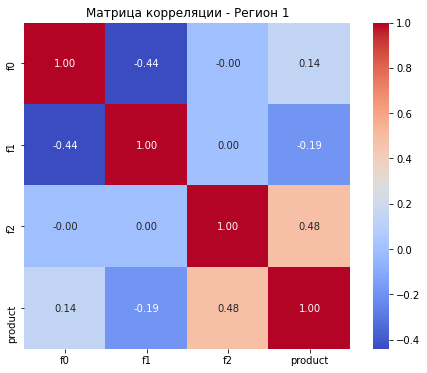

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(geo_data_0[['f0', 'f1', 'f2', 'product']].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title(f'Матрица корреляции - Регион 1')
plt.show()

По данной матрице можем сказать, что мультиколинеарности не наблюдается (будем считать признаки мультиколлинеарными если значение > 0.9). Наблюдается умеренная положительная корреляция у признаков f2-product и умеренная отрицательная у признаков f1-f0

**Проведем анализ данных в датасете geo_data_1**

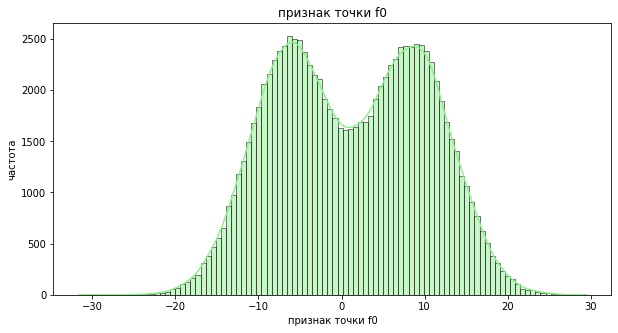

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(geo_data_1['f0'], bins=100, kde=True, color='lightgreen')
plt.title(f'признак точки f0')
plt.xlabel('признак точки f0')
plt.ylabel('частота')
plt.show()

По данному графику можно сказать, что значения признака f0 в диапазоне примерно от -30 до 30.
Распределение бимодальная, с двумя выраженными пиками около -10 и 10.


In [26]:
geo_data_1['f2'].nunique()


100000

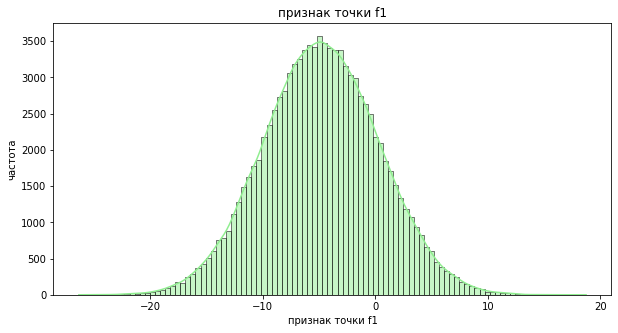

In [27]:
plt.figure(figsize=(10, 5))
sns.histplot(geo_data_1['f1'], bins=100, kde=True, color='lightgreen')
plt.title(f'признак точки f1')
plt.xlabel('признак точки f1')
plt.ylabel('частота')
plt.show()

Распределение близко к нормальному, но с длинным "хвостом" влево. Есть лёгкая асимметрия: данные смещены в сторону отрицательных значений. Признак варьируется от примерно -20 до 10.

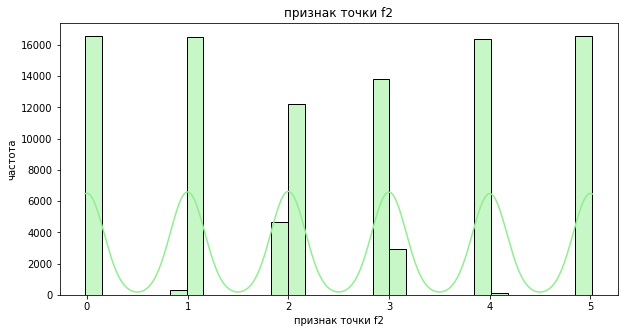

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(geo_data_1['f2'], bins=30, kde=True, color='lightgreen')
plt.title(f'признак точки f2')
plt.xlabel('признак точки f2')
plt.ylabel('частота')
plt.show()

По данному графику можно сказать, что признак f2 имеет дискретное распределение, значения сосредоточены вокруг фиксированных точек (0, 1, 2, 3, 4, 5). Между этими пиками значения почти не встречаются. Это говорит о том, что признак имеет ограниченное количество категорий или уровней.

In [29]:
geo_data_1['f2'].nunique()

100000

Так как данный признак является дискретным, но уникальных значений много лучше сгуппировать округленные значения

In [30]:
geo_data_1['f2_grouped'] = geo_data_1['f2'].round(1)

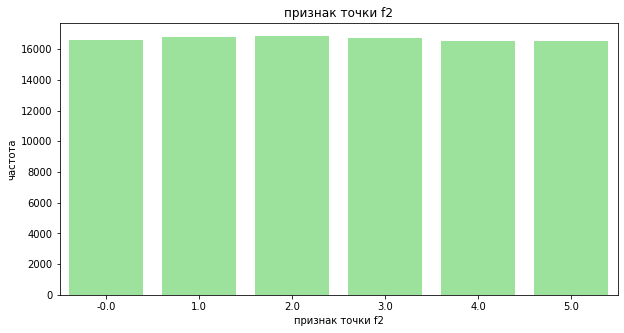

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(data=geo_data_1, x='f2_grouped', color='lightgreen')
plt.title(f'признак точки f2')
plt.xlabel('признак точки f2')
plt.ylabel('частота')
plt.show()

По данному графику можно сказать, что значения признака f2 принимают ограниченное количество уникальных значений —  6 значений: 0, 1, 2, 3, 4, 5.
Между этими пиками нет промежуточных значений — график показывает чёткие пики без плавного перехода.
Частоты у разных значений примерно одинаковые, что говорит о приближённо равномерном распределении по категориям.
Нет явных выбросов или перекосов в сторону одного значения.

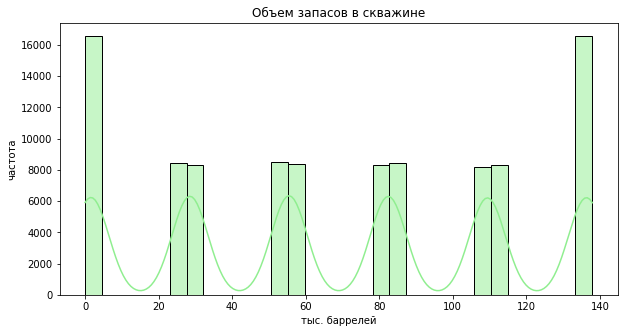

In [32]:
plt.figure(figsize=(10, 5))
sns.histplot(geo_data_1['product'], bins=30, kde=True, color='lightgreen')
plt.title(f'Объем запасов в скважине')
plt.xlabel('тыс. баррелей')
plt.ylabel('частота')
plt.show()

По данному графику можно сказать, что распределение также носит дискретный характер.
Есть пиковые значения на определённых уровнях объема (0, 40, 80, 120, 140 тыс. баррелей).

In [33]:
geo_data_1['product'].nunique()

12

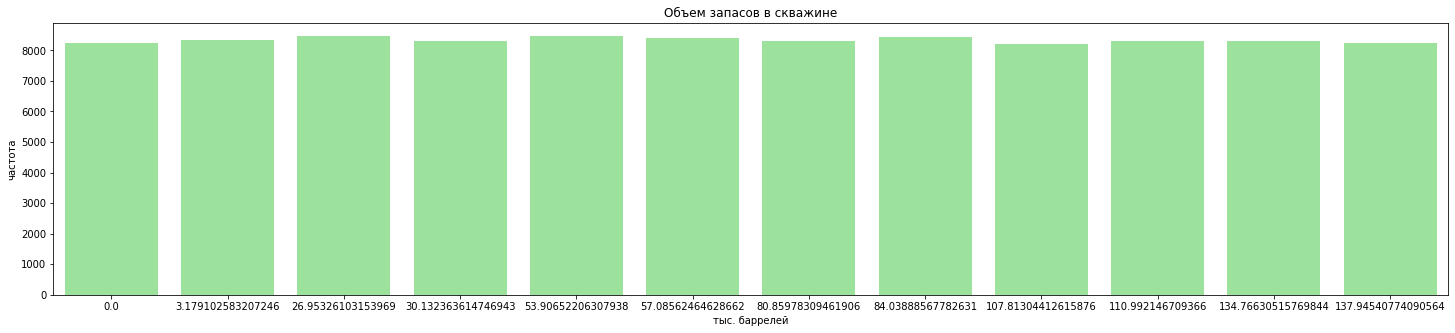

In [34]:
plt.figure(figsize=(25, 5))
sns.countplot(data=geo_data_1, x='product', color='lightgreen')
plt.title(f'Объем запасов в скважине')
plt.xlabel('тыс. баррелей')
plt.ylabel('частота')
plt.show()

Так как признак дискретный вывели столбчатую диаграмму, по данному графику также можно сказать, значения принимают ограниченное количество уникальных значений — 12 значений. Между этими пиками нет промежуточных значений — график показывает чёткие пики без плавного перехода. Частоты у разных значений примерно одинаковые, что говорит о приближённо равномерном распределении по категориям. Нет явных выбросов или перекосов в сторону одного значения.

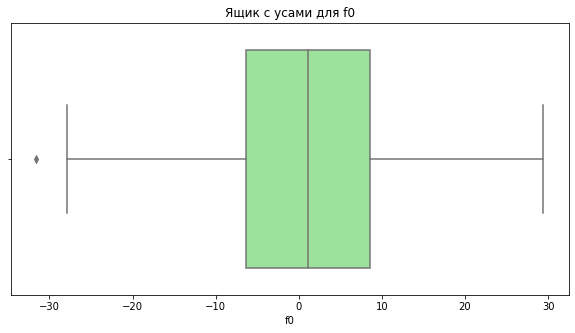

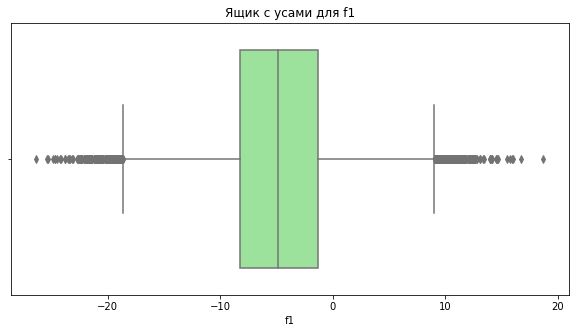

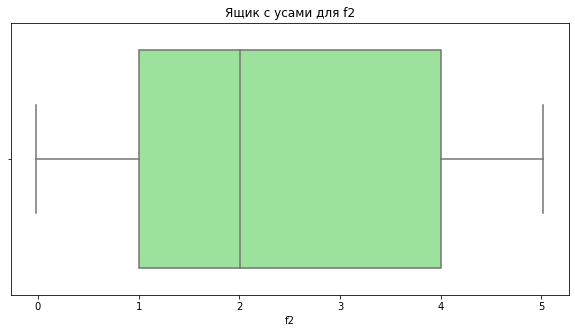

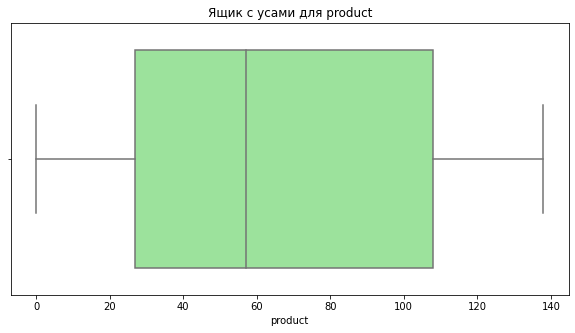

In [35]:
numerical_features = ['f0', 'f1',
                     'f2', 'product']
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=geo_data_1[feature], color='lightgreen')
    plt.title(f'Ящик с усами для {feature}')
    plt.xlabel(feature)
    plt.show()

- В столбце f0 медиана - 1.15, среднее значение - 1.14. Усы достаточно длинные, причем ус слева длиннее, медиана скошена вправо. Наблюдается выброс за пределом первого кваритиля
- В столбце f1 медиана: -4.8, среденее значение: -4.79 . Усы имеют примерно одинаковую длину, они уже короче, чем у предыдущего признака. По графику видно, что данные размещены симметрично, но наблюдается значительное количество выбросов за пределами первого и третьего квартиля
- В столбце f2 медиана - 2.0, среденее значение - 2.49. Усы примерно одинаковой длины, намного короче, чем у предыдущих признаков, медиана скошена влево. 
- В столбце product медиана - 57.08, среденее значение - 68.82. Усы примерно одинаковой длины, намного короче, чем у предыдущих признаков, медиана скошена влево. 

Изучим столбец с выбросами подробнее

In [36]:
# Вычисляем Q1 и Q3
Q1 = geo_data_1['f0'].quantile(0.25)
Q3 = geo_data_1['f0'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Идентификация выбросов
outliers = geo_data_1[(geo_data_1['f0'] < lower_bound) | (geo_data_1['f0'] > upper_bound)]

# Выводим выбросы
print(outliers.shape)

(1, 6)


Наблюдается 1 выброс, не будем его обрабатывать, тк он может содержать важную информацию

In [37]:
# Вычисляем Q1 и Q3
Q1 = geo_data_1['f1'].quantile(0.25)
Q3 = geo_data_1['f1'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Идентификация выбросов
outliers = geo_data_1[(geo_data_1['f1'] < lower_bound) | (geo_data_1['f1'] > upper_bound)]

# Выводим выбросы
print(outliers.shape)

(636, 6)


Наблюдается достаточно много выбросов, не будем их обрабатывать, тк они могут содержать важную информацию

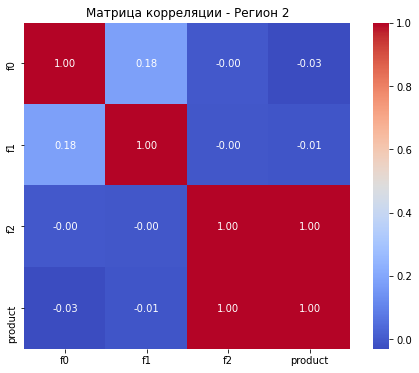

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(geo_data_1[['f0', 'f1', 'f2', 'product']].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title(f'Матрица корреляции - Регион 2')
plt.show()

По данной матрице можно заметить, что признаки f2-product мультиколлинеарны, но это не является проблемой тк в данном случае признак product - целевой

**Проведем анализ данных в датасете geo_data_2**

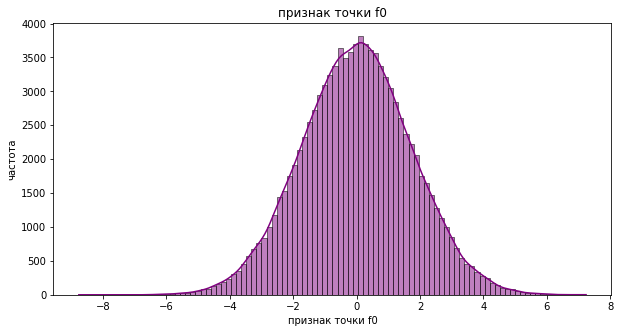

In [39]:
plt.figure(figsize=(10, 5))
sns.histplot(geo_data_2['f0'], bins=100, kde=True, color='purple')
plt.title(f'признак точки f0')
plt.xlabel('признак точки f0')
plt.ylabel('частота')
plt.show()

Распределение похоже на нормальное. Признак варьируется от примерно -8 до 8.

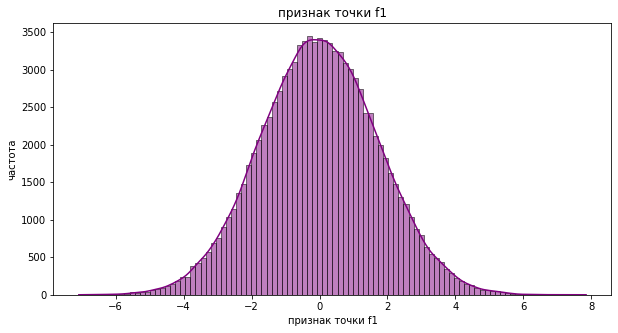

In [40]:
plt.figure(figsize=(10, 5))
sns.histplot(geo_data_2['f1'], bins=100, kde=True, color='purple')
plt.title(f'признак точки f1')
plt.xlabel('признак точки f1')
plt.ylabel('частота')
plt.show()

Распределение близко к нормальному, но с "хвостом" вправо. Есть лёгкая асимметрия: данные смещены в сторону положительных значений. Признак варьируется от примерно -6 до 8.

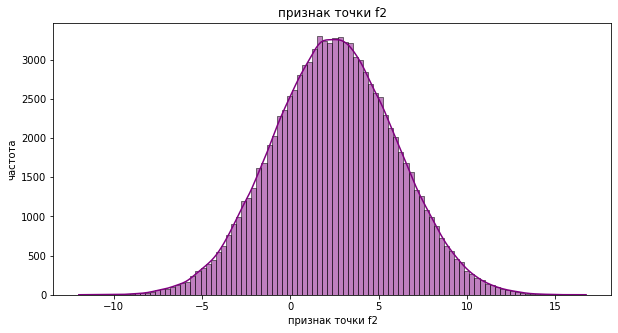

In [41]:
plt.figure(figsize=(10, 5))
sns.histplot(geo_data_2['f2'], bins=100, kde=True, color='purple')
plt.title(f'признак точки f2')
plt.xlabel('признак точки f2')
plt.ylabel('частота')
plt.show()

Распределение близко к нормальному, но с "хвостом" вправо. Есть лёгкая асимметрия: данные смещены в сторону положительных значений. Признак варьируется от примерно -10 до 15.

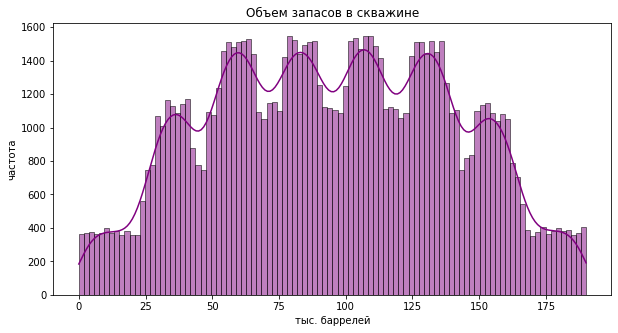

In [42]:
plt.figure(figsize=(10, 5))
sns.histplot(geo_data_2['product'], bins=100, kde=True, color='purple')
plt.title(f'Объем запасов в скважине')
plt.xlabel('тыс. баррелей')
plt.ylabel('частота')
plt.show()

Распределение с несколькими пиками, что может говорить о сегментированности скважин по объёму запасов. Явно видны пики в районе около 25, 50, 75, 100, 125 и 150 тыс. баррелей — возможно, эти значения связаны с ограничениями или округлениями при оценке. Распределение не является нормальным и имеет ступенчатую структуру.

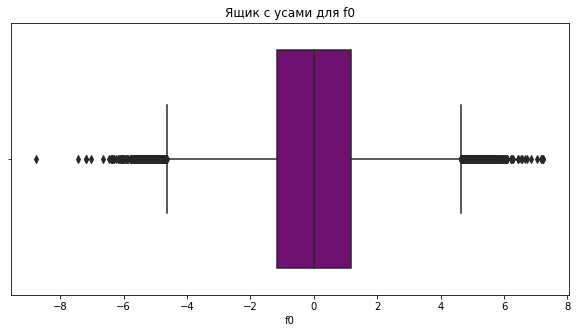

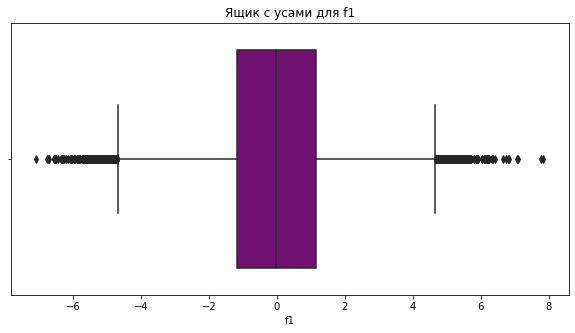

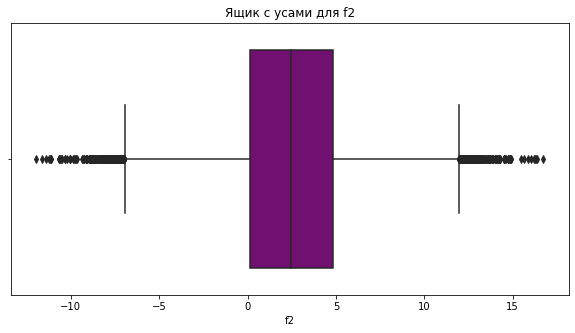

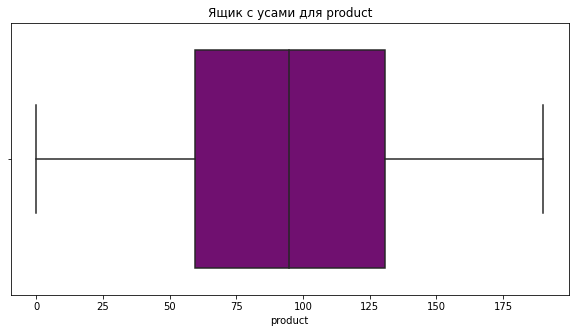

In [43]:
numerical_features = ['f0', 'f1',
                     'f2', 'product']
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=geo_data_2[feature], color='purple')
    plt.title(f'Ящик с усами для {feature}')
    plt.xlabel(feature)
    plt.show()

- В столбце f0 медиана - 0.009, среднее значение - 0.002, среднее отклонение достаточно сильное. Усы не такие длинные, но за их пределами наблюдается достаточное количество выбросов
- В столбце f1 медиана: -0.009, среденее значение: -0.002, опять же сильное среденее отклонение. Усы имеют примерно одинаковую длинуПо графику видно, что данные размещены симметрично, но наблюдается значительное количество выбросов за пределами первого и третьего квартиля
- В столбце f2 медиана - 2.484, среденее значение - 2.495. Усы примерно одинаковой длины. За их пределами наблюдается достаточное количество выбросов
- В столбце product медиана - 94.92, среденее значение - 95.. Усы примерно одинаковой длины, выбросов не наблюдается

In [44]:
geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Изучим столбцы с выбросами подробнее

In [45]:
# Вычисляем Q1 и Q3
Q1 = geo_data_2['f0'].quantile(0.25)
Q3 = geo_data_2['f0'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Идентификация выбросов
outliers = geo_data_2[(geo_data_2['f0'] < lower_bound) | (geo_data_2['f0'] > upper_bound)]

# Выводим выбросы
print(outliers.shape)

(733, 5)


In [46]:
# Вычисляем Q1 и Q3
Q1 = geo_data_2['f1'].quantile(0.25)
Q3 = geo_data_2['f1'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Идентификация выбросов
outliers = geo_data_2[(geo_data_2['f1'] < lower_bound) | (geo_data_2['f1'] > upper_bound)]

# Выводим выбросы
print(outliers.shape)

(684, 5)


In [47]:
# Вычисляем Q1 и Q3
Q1 = geo_data_2['f2'].quantile(0.25)
Q3 = geo_data_2['f2'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Идентификация выбросов
outliers = geo_data_2[(geo_data_2['f2'] < lower_bound) | (geo_data_2['f2'] > upper_bound)]

# Выводим выбросы
print(outliers.shape)

(584, 5)


Во всех признаках много выбросов, удалять их не будем, тк в них могут содержаться важные данные 

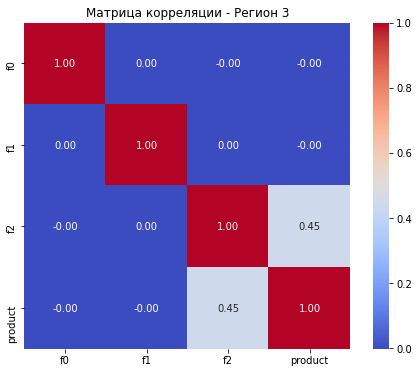

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(geo_data_2[['f0', 'f1', 'f2', 'product']].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title(f'Матрица корреляции - Регион 3')
plt.show()

По данной матрице видим, что мультиколлинерных признаков нет, наблюдается умеренная положительная корреляция у признаков f2-product(0.45)

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Их действительно не стоит удалять. Объявлять все данные, выходящие за "усы" выбросами, мешиющими обучению - затея не очень классная. Представь, что ты решаешь задачу предсказания стоимости квартиры. Будет ли выбросом квартира с огромной площадью в центре Москвы с очень большой стоимостью мешать обучению модели? Нет, тут всё очень даже логично. Да, таких будет, вероятно, немного, но такие же существуют, и с ними тоже надо уметь работать, а если их выкинуть из обучения, то существует вероятность того, что твоя модель будет занижать стоимость таких квартир, и владельцы элитного жилья с тобой сотрудничать не будут.

В нашем случае эти значения - это просто хвосты распределения, о чём можно судить потому что 1) они лежат достаточно близко к "усам", и весьма большими количествами, такими скажем "косяками", а не отдельными точками, сильно от "усов" удалёнными 2) по гистограммам признаков, тебя ничего не смущает, ты и сама можешь скажать, что мол "ну это просто хвост распределения"

<div class="alert alert-warning">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Учитывая, что по условию задания мы обучаем именно линейные модели, стоит убедиться в том, что в данных нет мультиколлинеарности, для чего стоит провести корреляционный анализ.

#Добавила матрицы корреляций#

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера v2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
👍

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий ревьюера v2</b></font>
    <br /> 
    <font size="3", color = "black">
        <b></b>

Метод `.corr()` по умолчанию вычисляет коэффициенты корреляции Пирсона, а она по идее создана для нормальнораспределённых величин, у нас далеко не все признаки такие. Лучше было вычислять корреляцию Спирмена (`.corr(method='spearman')`, либо коэффициенты Phi_K.

## Обучение и проверка модели

In [51]:
def fit_model(data):
    features = data[['f0', 'f1', 'f2']]  
    target = data['product'] 
    
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=42)
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    
    predictions = model.predict(features_valid)
    
    mean_predicted = predictions.mean()
    #rmse = mean_squared_error(target_valid, predictions, squared=False)
    rmse = mean_squared_error(target_valid, predictions)**0.5


    print("Средний запас предсказанного сырья:", mean_predicted)
    print("RMSE модели:", rmse)
    
    return(predictions, target_valid.reset_index(drop=True), rmse)

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Здорово, что оформляешь код в функции. Куда лучше, чем плодить множество практически идентичных блоков кода.

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Поскольку линейная модель - не самый мощный ML инструмент, с ней рекомендуется попробовать создание новых признаков. Например, полиномиальных - они могут и в текущем проекте сильно повлиять на итоговые результаты.

In [52]:
results = []

for idx, region_data in enumerate([geo_data_0, geo_data_1, geo_data_2]):
    print(f"\nРЕГИОН {idx+1}")
    preds, targets, error = fit_model(region_data)
    results.append((preds, targets, error))


РЕГИОН 1
Средний запас предсказанного сырья: 92.39879990657768
RMSE модели: 37.75660035026169

РЕГИОН 2
Средний запас предсказанного сырья: 68.71287803913762
RMSE модели: 0.890280100102884

РЕГИОН 3
Средний запас предсказанного сырья: 94.77102387765939
RMSE модели: 40.145872311342174


<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Метрики во всех регионах выглядят правдоподобно

Чтобы проанализировать данные результаты, нужно знать, что RMSE (Root Mean Squared Error) — это метрика, которая показывает среднюю величину ошибки модели между предсказанными значениями и фактическими. Измеряется в тех же единицах, что и предсказываемая величина. И лучший результат тот, где это значение меньше(самая высокая точность если показатель меньше 10%).



- Регион 3:Самый высокий средний предсказанный запас — почти 95 тыс. баррелей.
Но ошибка довольно велика — 40.15, что указывает на низкую точность модели.
Может принести много прибыли, но риск переоценки высок.
- Регион 1:Средний запас чуть меньше — ~92 тыс. баррелей.
Чуть лучше по точности, чем регион 3 (RMSE ~37.76).

- Регион 2:Наименьший предсказанный средний запас — ~69 тыс. баррелей.
Минимальная ошибка (RMSE = 0.89) — модель почти идеально предсказывает, но объёмы слишком маленькие.
Очень точная модель, но, вероятно, невыгодный регион.


**Вывод:**
Регион 2 — самый надёжный с точки зрения предсказаний, но запасов мало.
У регионa 1 и высокие запасы, и умеренная ошибка.
Регион 3 может быть чуть выгоднее по объёму, но риск выше из-за большой ошибки.


In [53]:
predictions_1, validation_1, rmse_1 = results[0]
predictions_2, validation_2, rmse_2 = results[1]
predictions_3, validation_3, rmse_3 = results[2]


<div class="alert alert-warning">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
        <b></b>

По 2 раза вызывать обучение модели - ну очень такое себе. Ладно у нас лёгонькая линейка, а если какая-то тяжеловесная модель, обучаемая долго? Потратишь кучу времени впустую. У тебя же всё сохранено в переменной `results`, зачем создавать по сути дубликаты уже имеющихся сущностей?

Исправила 

## Подготовка к расчёту прибыли

У нас следующие условия задачи:
- Доход с 1 тыс. баррелей: 450_000 руб.
- Бюджет на разработку региона: 10_000_000_000 руб.
- Количество скважин для разработки: 200


In [54]:
budget = 10**10 
income_per_unit = 450000
number_of_wells = 200

Рассчитаем безубыточный объём сырья на одну скважину

Чтобы не уйти в убыток, каждая из выбранных 200 скважин должна в среднем принести доход, покрывающий вложения.

Доход=Объём сырья×450000


Чтобы покрыть бюджет: 200×Объём×450000≥10000000000

In [55]:
min_volume_per_well = budget / (number_of_wells * income_per_unit)
print(f'Минимальный объём нефти на скважину для безубыточности: {min_volume_per_well:.2f} тыс. баррелей')


Минимальный объём нефти на скважину для безубыточности: 111.11 тыс. баррелей


<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Расчёт корректен

Мы получили, что порог безубыточности: ≈ 111.11 тыс. баррелей на скважину.
Ни один из регионов не достигает этого порога по среднему значению предсказанного объёма — риски высоки.

## Расчёт прибыли и рисков 

In [63]:
#функция для расчёта прибыли по выбранным скважинам 
def calculate_profit(predictions, target):
    max_pred = predictions.sort_values(ascending=False).head(200)
    max_target = target.loc[max_pred.index]
    total_volume = max_target.sum()
    
    revenue = total_volume * income_per_unit
    profit = revenue - budget
    return profit

In [64]:
regions = {
    'Регион 1': (results[0][0], results[0][1]),
    'Регион 2': (results[1][0], results[1][1]),
    'Регион 3': (results[2][0], results[2][1]),
}

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
Нет, ну 3 раза обучать одни и те же модели, когда достаточно одного - это уже перебор 😱

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера v2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    
Теперь
<img src="https://kartinkof.club/uploads/posts/2022-03/1648241141_25-kartinkof-club-p-mem-priemlemo-s-kotom-25.jpg" width=300>

In [65]:
for name, (preds, target) in regions.items():
    profit = calculate_profit(pd.Series(preds), pd.Series(target))
    print(f"{name}: прибыль — {profit:,.2f} руб.")

Регион 1: прибыль — 3,359,141,114.46 руб.
Регион 2: прибыль — 2,415,086,696.68 руб.
Регион 3: прибыль — 2,598,571,759.37 руб.


In [66]:
def bootstrap_profit(predictions, target, n_bootstrap=1000, sample_size=500):
    state = np.random.RandomState(12345)
    values = []

    data = pd.DataFrame({
        'pred': predictions,
        'target': target
    })

    for _ in range(n_bootstrap):
        sample = data.sample(n=sample_size, replace=True, random_state=state).reset_index(drop=True)
        
        
        profit = calculate_profit(sample['pred'], sample['target'])
        
        values.append(profit)

    return pd.Series(values)


<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера v2</b></font>
    <br /> 
    <font size="3", color = "black">
        <b></b>

И снова приемлемо! Логичнее было бы не разделять при вызове функции `calculate_profit` датафрейм на отдельные столбцы, передавать весь сэмпл и внутри функции делать `sample.sort_values(by='pred', ascending=False)['target'][:200]`, но как у тебя тоже ок, ошибки больше нет.

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
2 момента по расчёту прибыли:

1. У тебя для расчёта прибыли чуть выше описана функция, зачем логику функции дублировать в коде функции с бутстрапом? Просто когда готовы сэмплы вызывай `calculate_profit`.
2. Прибыль - это разница дохода и расхода. Доход у тебя посчитан верно, а расход никак не учитывается. Добавь в конец функции прибыли вычитание бюджета на разработку.

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Но есть пролема серьёзнее. У тебя в функции есть один ну очень неочевидный баг. Настолько неочевидный, что без бутстрапа функция бы была абсолютно корректной, а вот с ним есть нюансы. Я добавил тебе отладочную печать, которая срабатывает, когда у тебя для 200 предсказаний почему-то берётся в расчёт больше, чем 200 таргетов. Явно нежелательное поведение, но печать срабатывает регулярно (смотри ниже). Сейчас покажу из-за чего на небольшом синтетическом примере:

In [67]:
# КОД РЕВЬЮЕРА
# предположим, у нас есть небольшой сэмпл из 5 предсказаний и 5 соответствующих таргетов
_target = pd.Series([2, 2, 3, 3, 3], index=[2, 2, 3, 3, 3])
_preds = pd.Series([2, 2, 3, 3, 3], index=[2, 2, 3, 3, 3]).sort_values(ascending=False)


# берём таргеты по индексам предсказаний:

display(_target.loc[_preds.index])

3    3
3    3
3    3
3    3
3    3
3    3
3    3
3    3
3    3
2    2
2    2
2    2
2    2
dtype: int64

<div class="alert alert-danger">
<font size="4"></font>
    <font size="3", color = "black">
Как так? Почему предсказаний 5, а таргетов аж 13? На самом деле, всё очень просто. На примере элементов с индексом и значением 2. Когда мы попросили у пандаса взять таргеты по индексам предсказаний, и у нас и там и там 2 одинаковых элемента, он отнюдь должен вернуть не 2. Он для каждого запрошенного индекса предсказаний выдаёт все таргеты с таким индексом. Таким образом, мы запросили 2 раза элемента с индексом 2 - оба раза пандас отдал нам 2 таких элемента из таргетов - всего 4 элемента. А если бы у нас было и там, и там по 3 одинаковых элемента, то в итоге было бы 9. Логика, надеюсь, ясна. И вот поэтому почти всегда получается, что когда ты берёшь таргеты по индексам 500 предсказаний, получаешь в итоге более чем 500 таргетов. Благодаря бутстрапу в выборках есть идентичные элементы, с одинаковыми индексами, и они каждый раз вот таким образом "множатся" при вычислении прибыли.
<br>

Да, с помощью `[:200]` непосредственно в расчёт прибыли можно передать ровно 200 скважин, но может получиться ситуация (и регулярно случается), что в исходном сэмпле некая скважина встретилась 2 раза, а в расчёт попадает 4. То есть, расчёт хоть близкий к корректному, но таковым всё же не является.

Теперь поговорим о том, как же с этим быть. Вариантов устранения проблемы несколько. Можно предсказания и таргеты хранить в едином датафрейме. Метод `.sample()` у датафрейма есть, сэмплируем датафрейм, а не отдельно таргет/предсказание, сортируем сэмпл по одному столбцу (предсказание), значения для прибыли берём из другого (таргет). Всё, операция взятия по индексу тебе становится вообще не нужна и ошибка не возникает. Если лень делать датафрейм из двух столбцов, то можно <u>когда сэмплы готовы, но вычисление ещё не начато</u>, предсказания не сортированы, сделать для сэмплов сброс индексов `.reset_index(drop=True)`, тогда индексы станут уникальными и ошибки тоже не будет.

Сброс индексов у тебя есть, но почему он никак не повлиял на ошибку я пподчеркнул: его надо сделать когда проведено сэмплирование и появились эти дубликаты.

Подкорректировала

In [68]:
profits = []

for i, (preds, targets, _) in enumerate(results):
    print(f"\nРЕГИОН {i+1}")
    profit_dist = bootstrap_profit(preds, targets)
    profits.append(profit_dist)

    mean_profit = profit_dist.mean()
    lower = profit_dist.quantile(0.025)
    upper = profit_dist.quantile(0.975)
    risk = (profit_dist < 0).mean()

    print(f"Средняя прибыль: {mean_profit:,.2f} руб.")
    print(f"95%-й доверительный интервал: [{lower:,.2f}, {upper:,.2f}] руб.")
    print(f"Риск убытков: {risk:.2%}")



РЕГИОН 1
Средняя прибыль: 406,278,783.42 руб.
95%-й доверительный интервал: [-117,742,136.49, 911,737,050.75] руб.
Риск убытков: 6.70%

РЕГИОН 2
Средняя прибыль: 432,624,131.81 руб.
95%-й доверительный интервал: [16,846,174.93, 815,972,526.29] руб.
Риск убытков: 1.90%

РЕГИОН 3
Средняя прибыль: 377,362,192.42 руб.
95%-й доверительный интервал: [-170,780,417.71, 901,772,131.39] руб.
Риск убытков: 7.40%


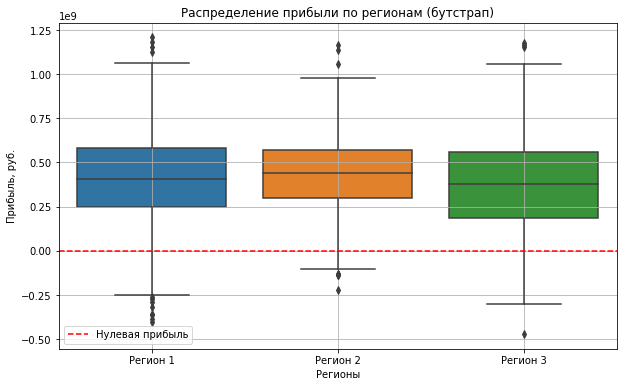

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=profits)
plt.axhline(0, color='red', linestyle='--', label='Нулевая прибыль')
plt.title('Распределение прибыли по регионам (бутстрап)')
plt.xlabel('Регионы')
plt.ylabel('Прибыль, руб.')
plt.xticks(ticks=[0, 1, 2], labels=['Регион 1', 'Регион 2', 'Регион 3'])
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера v2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Красивое 🙂

Исследуя данные графики можно сделать вывод:

- 1 регион:
Медиана примерно 480 млн, наблюдается много значений меньше 0. Средняя прибыль: 406,278,783.42 руб.
95%-й доверительный интервал: [-117,742,136.49, 911,737,050.75] руб.
Риск убытков: 6.70%


- 2 регион:
Медиана примерно 500 млн руб, небольшое количество значений меньше 0. Средняя прибыль: 432,624,131.81 руб.
95%-й доверительный интервал: [16,846,174.93, 815,972,526.29] руб.
Риск убытков: 1.90%



- 3 регион:
Медиана примерно 400 млн руб, наблюдаются значения меньше 0. Средняя прибыль: 377,362,192.42 руб.
95%-й доверительный интервал: [-170,780,417.71, 901,772,131.39] руб.
Риск убытков: 7.40%.

Таким образом, все регионы потенциально прибыльные, но регион 2 показывает: наибольшую среднюю прибыль, уверенный доверительный интервал, стабильную работу модели (низкое RMSE на предыдущих этапах). По этой причине разрабатывать скважины лучше всего в регионе 2 — он обеспечивает наибольшую потенциальную прибыль при нулевом риске убытков.

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Финальные результаты было бы неплохо визуализировать, ведь они - то, ради чего вся работа делалась. Для этого подойдут ящики с усами или гистограммы распределений выборочных прибылей с нанесёнными на них границами найденных дов. интервалов.

Добавила визуализацию

## Общий вывод

**Цель проекта**

Определить, в каком из трёх регионов целесообразно бурить новые скважины, чтобы:
- максимизировать прибыль;
- снизить риск убытков до минимума (менее 2.5%);
- опираться на прогнозы модели линейной регрессии по трём признакам (`f0`, `f1`, `f2`).

---

**Обучение модели**

- **Модель**: линейная регрессия  
- **Данные**: по 100 000 скважин в каждом регионе  
- **Деление**: 75% — обучение, 25% — валидация  

| Регион    | Средний предсказанный объём (тыс. баррелей) | RMSE           |
|-----------|----------------------------------------------|----------------|
| Регион 1  | 92.4                                          | 37.8           |
| Регион 2  | 68.7                                          | **0.89**      |
| Регион 3  | 94.8                                          | 40.1           |

 *Наименьшая ошибка модели — в регионе 2*

---

**Подготовка к расчёту прибыли**

- **Бюджет**: 10 млрд рублей  
- **Цена за 1 тыс. баррелей**: 450 тыс. руб.  
- **Выбираются 200 лучших скважин из 500**  

**Безубыточный объём одной скважины:**

min_volume = 10_000_000 / 200 / 450 = 111.1 тыс. баррелей


| Регион    | Средний предсказанный объём | Достаточный? |
|-----------|-----------------------------|---------------|
| Регион 1  | 92.4                         | Нет         |
| Регион 2  | 68.7                         | Нет         |
| Регион 3  | 94.8                         | Нет         |

 *Предсказанные объёмы меньше порогового, но реальная прибыль может быть выше — проверим далее.*

---

**Расчёт прибыли и рисков (Bootstrap, 1000 выборок)**

| Регион    | Средняя прибыль (₽)     | 95% доверительный интервал (₽)              | Риск убытков |
|-----------|--------------------------|----------------------------------------------|---------------|
| Регион 1  | 406,278,783 руб.               | от -117.7 до 911.7 млн                        | 6.70%         |
| **Регион 2**  | **432,624,132 руб.**           | от 16.8 до 816.0  млн                       | **1.90%**     |
| Регион 3  | 377,362,192 руб.               | от -170.8 до 901.8 млн                        | 7.40%         |

---

**Вывод и возможные рекомендации**

У нас есть условие, что риск убытков должен быть меньше 2.5%
- Регион 1 и регион 3 не соответствуют критерию (риск 6.7% и 7.4%).


- Регион 2 — единственный, где риск ниже 2.5%, а именно 1.9%.
Регион 2 также имеет:
Самую высокую среднюю прибыль. Положительную нижнюю границу доверительного интервала (единственный регион, у которого уверенность в положительной прибыли ≥ 95%).

---


<div class="alert alert-info">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Подведём итоги. В целом, хорошая работа, но несколько ошибок вынуждают меня отправить на доработку. Что жду к следующему разу:

+ Обучение одних и тех же моделей не 3 раза :)
+ Вычитание бюджета из дохода
+ Использование функции прибыли внутри бутстрапа вместо дублирования логики кода
+ Устранение бага с индексами

На этом пока всё. Жду новую отправку!

Хорошо, спасибо! Учту свои ошибки

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован